In [2]:
#install library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
#upload csv file
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.isnull().sum() #check NaN value

Gender    0
Height    0
Weight    0
dtype: int64

In [17]:
df.shape #check how meny row and column on data set

(10000, 3)

<AxesSubplot:xlabel='Weight', ylabel='Count'>

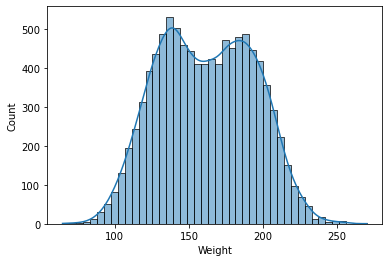

In [11]:
sns.histplot(df['Weight'], kde=True)

In [15]:
#check mean value
mean_value = df['Weight'].mean()
mean_value

161.44035683283076

In [16]:
#check standard value
std_value = df['Weight'].std()
std_value

32.108439006519546

In [24]:
#check Three Standard (Positive) value
std_3 = mean_value + (2.5 * std_value)
std_3

241.7114543491296

In [25]:
#check Three Standard (Negative) value
neg_std_3 = mean_value - (2.5 * std_value)
neg_std_3

81.16925931653189

In [29]:
#check Out Layer value (positive)
df[df['Weight'] > std_3]

,Gender,Height,Weight
0,Male,73.847017,241.893563
994,Male,78.095867,255.690835
1506,Male,75.698618,249.565628
1610,Male,76.617546,255.863326
1750,Male,74.604668,249.946283
1896,Male,76.472880,246.232321
2014,Male,78.998742,269.989699
2070,Male,77.465569,252.556689
2971,Male,75.156879,250.317151
3228,Male,76.268668,247.386741


In [30]:
#check Out Layer value (Negative)
df[df['Weight'] < neg_std_3]

,Gender,Height,Weight
5360,Female,55.668202,68.982530
5740,Female,56.108902,80.531259
6624,Female,54.616858,71.393749
6982,Female,56.764456,79.174376
7294,Female,54.873728,78.606670
7935,Female,58.211650,77.523774
8241,Female,56.167299,77.898559
9285,Female,54.263133,64.700127
9566,Female,57.353093,72.750145


In [33]:
#marge positive and negatve value
marge = df[(df['Weight'] > std_3) | (df['Weight'] < neg_std_3)]
marge.shape

(27, 3)

In [37]:
#remove out lier columns
remove_out_columns = df[(df['Weight'] < std_3) & (df['Weight'] > neg_std_3)]
remove_out_columns.shape

(9973, 3)

<AxesSubplot:xlabel='Weight', ylabel='Count'>

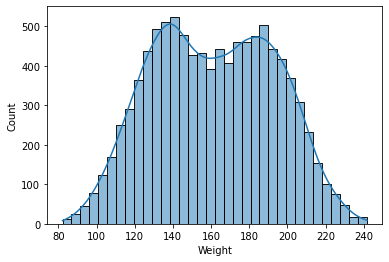

In [38]:
#check new data
sns.histplot(remove_out_columns['Weight'], kde=True)

In [42]:
#one hot encoding
dummy_variable = pd.get_dummies(remove_out_columns['Gender'], drop_first=True)
dummy_variable.head()

,Male
1,1
2,1
3,1
4,1
5,1


In [44]:
#create new data set and remove gender column
new_df = remove_out_columns.drop(['Gender'], axis=1)
new_df.head()

,Height,Weight
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
5,67.253016,152.212156


In [46]:
#now concat two table (new_df & dummy_variable) and create e final data set
final_df = pd.concat([new_df, dummy_variable], axis=1)
final_df.head()

,Height,Weight,Male
1,68.781904,162.310473,1
2,74.110105,212.740856,1
3,71.730978,220.042470,1
4,69.881796,206.349801,1
5,67.253016,152.212156,1


In [47]:
x = final_df.drop(['Height'], axis=1)
x.head()

,Weight,Male
1,162.310473,1
2,212.740856,1
3,220.042470,1
4,206.349801,1
5,152.212156,1


In [50]:
y = final_df['Height']
y.head()

1    68.781904
2    74.110105
3    71.730978
4    69.881796
5    67.253016
Name: Height, dtype: float64

In [53]:
#LinearRegession
from sklearn.model_selection import train_test_split

In [54]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.30, random_state=42)

In [55]:
xtrain.shape

(6981, 2)

In [56]:
xtest.shape

(2992, 2)

In [57]:
ytrain.shape

(6981,)

In [59]:
ytest.shape

(2992,)

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
linear = LinearRegression()

In [62]:
linear.fit(xtrain, ytrain)

LinearRegression()

In [63]:
linear.coef_

array([ 0.122874  , -0.94620162])

In [65]:
linear.intercept_

47.01102167988633

In [66]:
linear.predict(xtest)

array([65.93908337, 71.2885776 , 69.35055021, ..., 66.50690792,
       63.97453349, 62.64210708])

In [67]:
linear.score(xtest, ytest)

0.8554817940443755

In [71]:
from sklearn.metrics import mean_squared_error, r2_score

In [72]:
pred = linear.predict(xtest)

In [73]:
mean_squared_error(ytest, pred)

2.1062111119133307

In [74]:
r2_score(ytest, pred)

0.8554817940443755